<a href="https://colab.research.google.com/github/Vayansh/Machine_learning_training/blob/main/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class SVM:
  def __init__(self,learning_rate = 0.001, lambda_param = 0.01, n_iter = 1000):
    self.lr = learning_rate
    self.lp = lambda_param
    self.n_iter = n_iter
    self.weights = None
    self.bais = None

  def fit(self,X,y):
    n_samples, n_features = X.shape

    self.weights = np.array(np.random.randint(10,size = n_features),np.float32)
    self.bais = np.random.randint(10)

    y_ = np.where(y>0,1,-1)

    for _ in range(self.n_iter):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i,self.weights) - self.bais) >= 1

        if condition:
          self.weights -= self.lr*self.lp*2*self.weights
        else:
          self.weights -= self.lr*(2*self.lp*self.weights - np.dot(y_[idx],x_i))
          self.bais -= self.lr*y_[idx]


  def predict(self,X):
    approx = np.dot(X,self.weights) - self.bais
    return np.where(approx>0,1,0)


In [ ]:
svm = SVM()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
def accuracy_score(y_test,y_pred):
  return np.sum(y_test == y_pred) / len(y_test)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
def visualize_svm():
  def get_hyperplane_value(x,w,b,offset):
    return (-w[0]*x + b + offset)/w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.scatter(X_train[:,0],X_train[:,1],marker = 'o',c = y_train)

  x0_1 = np.amin(X_train[:,0])
  x0_2 = np.amax(X_train[:,0])

  x1_1 = get_hyperplane_value(x0_1,svm.weights,svm.bais,0)
  x1_2 = get_hyperplane_value(x0_2,svm.weights,svm.bais,0)

  x2_1 = get_hyperplane_value(x0_1,svm.weights,svm.bais,1)
  x2_2 = get_hyperplane_value(x0_2,svm.weights,svm.bais,1)

  x3_1 = get_hyperplane_value(x0_1,svm.weights,svm.bais,-1)
  x3_2 = get_hyperplane_value(x0_2,svm.weights,svm.bais,-1)

  plt.plot([x0_1,x0_2],[x1_1,x1_2] , 'y--')
  plt.plot([x0_1,x0_2],[x2_1,x2_2],'k')
  plt.plot([x0_1,x0_2],[x3_1,x3_2],'k')
  plt.show()


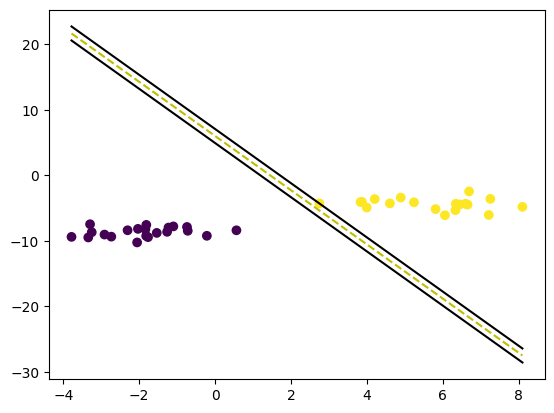

In [ ]:
visualize_svm()